# 060524 SI Figures

In [1]:
import sys
# add path for my packages
sys.path.append('C:\\Users\\katsuya2\\OneDrive - University of Illinois - Urbana\\Documents\\Python Scripts\\my_packages')
import re
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import ast
from scipy import optimize
from scipy.optimize import curve_fit
from scipy.stats import norm
import scipy.stats as stats
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from tqdm import tqdm
from pathlib import Path
from glob import glob
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, make_scorer, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor


%precision 3
%matplotlib inline

# use my matplotlib style
style_p = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/my_packages")
plt.style.use(Path(style_p, 'my_rc_setting.mplstyle'))

import Lorentzian

# Figure S1

In [6]:
# plot UV_vis spectra
p_data = Path("C:/Users/katsuya2/OneDrive - University of Illinois - Urbana/Documents/Python Scripts/projects/AuNR_DA/datasets")
uvvis_data = pd.read_csv(Path(p_data, 'uvvis_AuNR25x85.csv'))
TEM_data = pd.read_csv(Path(p_data, 'tem_AuNR25x85.csv'))

Text(0, 0.5, 'Absorbance (a. u.)')

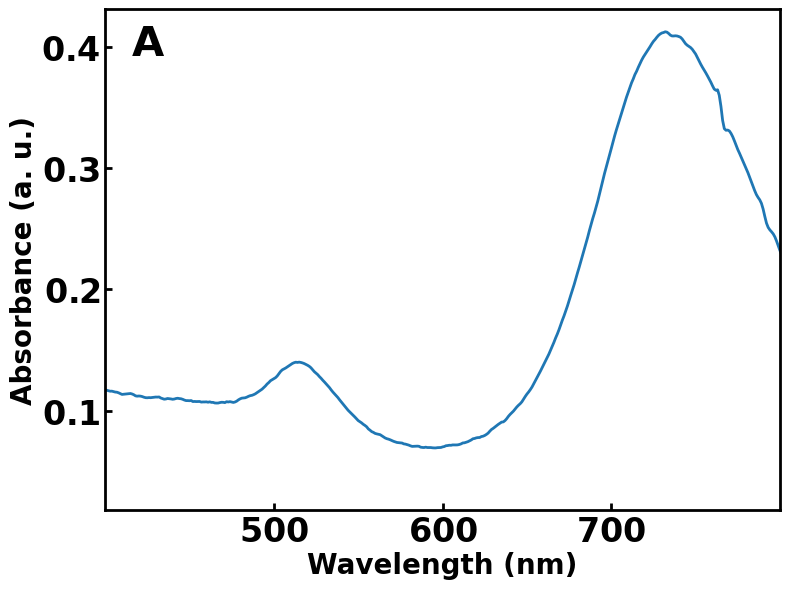

In [7]:
fig, ax = plt.subplots()
ax.plot(uvvis_data['wav'], uvvis_data['absorbance'], lw=2)
ax.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)
ax.set_xlim(400, 800)
ax.set_xticks([500, 600, 700])
# ax.set_yticks([0, 0.05, 0.1, 0.15])
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Absorbance (a. u.)')

# ax.vlines(733, 0, 0.5, color='b', ls='--', lw=1)
# plt.savefig("ITO_FigureS1A.svg", format="svg", dpi=300)

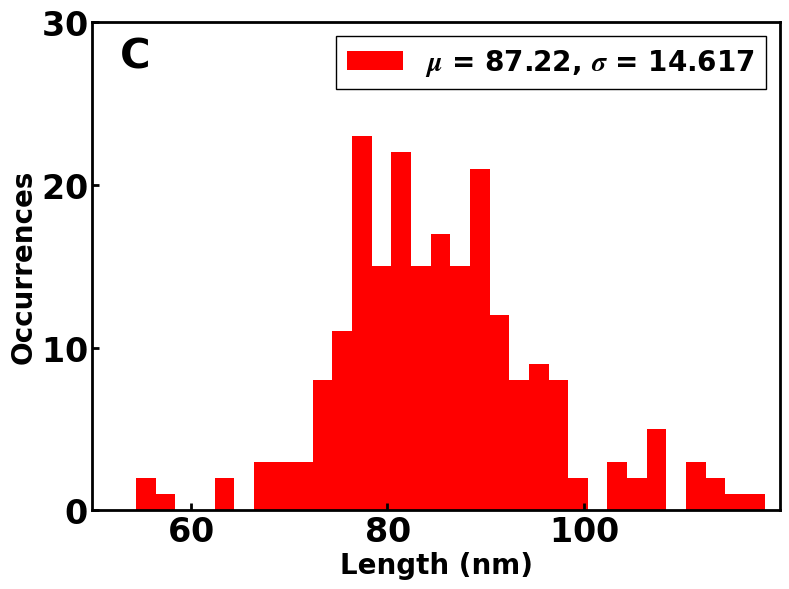

In [8]:
width = TEM_data['Minor']
length = TEM_data['Major']

fig, ax = plt.subplots()
binwidth = 2
# target = glass_exp_data['eres']
target = length
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='r', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'C', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Length (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 30)
ax.set_xlim(50, 120)

ax.set_xticks([60, 80, 100])
ax.set_yticks([0, 10, 20, 30])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1C.svg", format="svg", dpi=300)

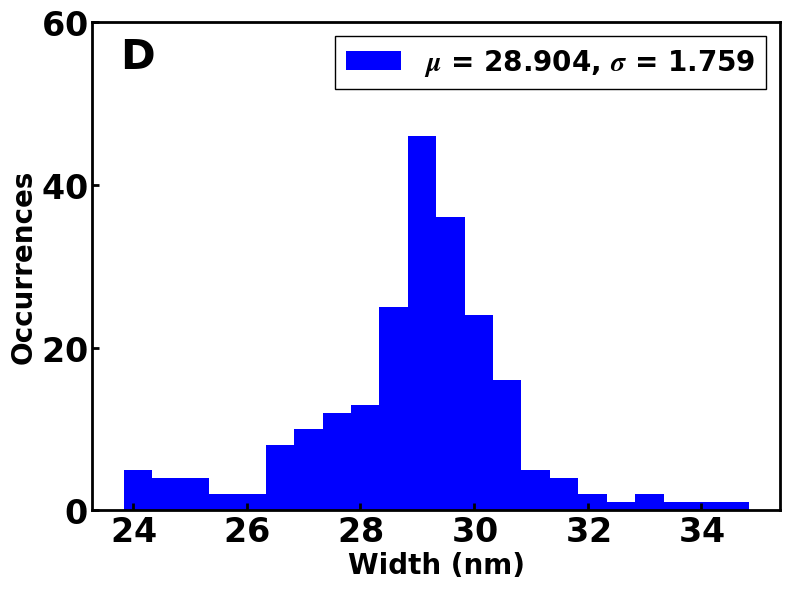

In [9]:
fig, ax = plt.subplots()
binwidth = 0.5
target = width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='b', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'D', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Width (nm)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 60)
# ax.set_xlim(0.8, 1.2)

ax.set_xticks([24, 26, 28, 30, 32, 34])
ax.set_yticks([0, 20, 40, 60])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1D.svg", format="svg", dpi=300)

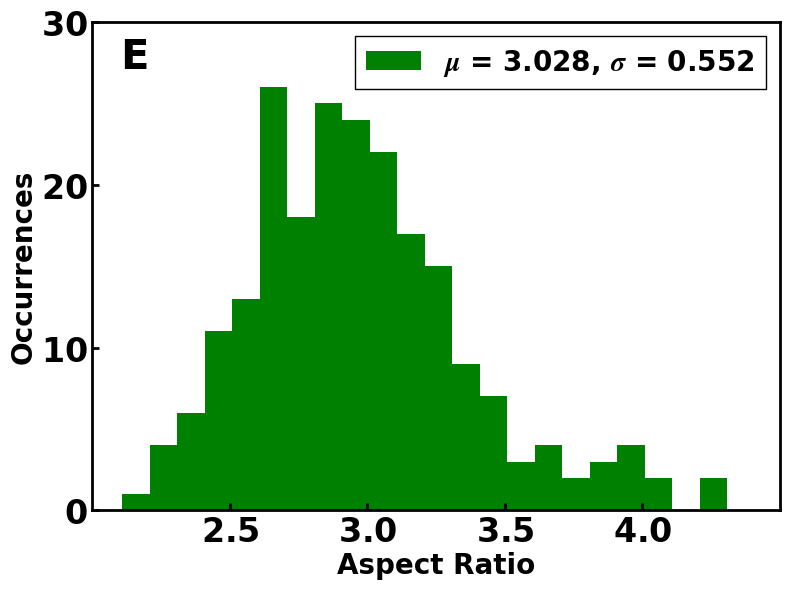

In [10]:
fig, ax = plt.subplots()
binwidth = 0.1
# target = glass_exp_data['eres']
target = length/width
mean = np.mean(target)
std = np.std(target)
target_divided_mean = target/mean
ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), 
        color='g', label=f'$\mu$ = {round(mean, 3)}, $\sigma$ = {round(std, 3)}')

# ax.vlines(0, 0, 35, color='k', ls='--', lw=2)
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)
ax.text(0.04, 0.97, 'E', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Aspect Ratio')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, 30)
ax.set_xlim(2, 4.5)

ax.set_xticks([2.5, 3.0, 3.5, 4.0])
ax.set_yticks([0, 10, 20, 30])

ax.legend(fontsize=20)

# plt.savefig("ITO_FigureS1E.svg", format="svg", dpi=300)

# Figure S2

In [11]:
# define testing data from actual experiments
exp_glass_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_glass_final.csv'))
exp_ito_data = pd.read_csv(Path(p_data, '100323_ZJ_exp_ito_final.csv'))
exp_ito_data = exp_ito_data.drop(47)
exp_ito_data = exp_ito_data.reset_index(drop=True)

# particles on glass outliers particles 47, 67, 71
outliers_particles = [47, 67, 71]
exp_glass_data = exp_glass_data.drop(outliers_particles)
exp_glass_data.reset_index(drop=True, inplace=True)
print(exp_glass_data.shape)

(129, 11)


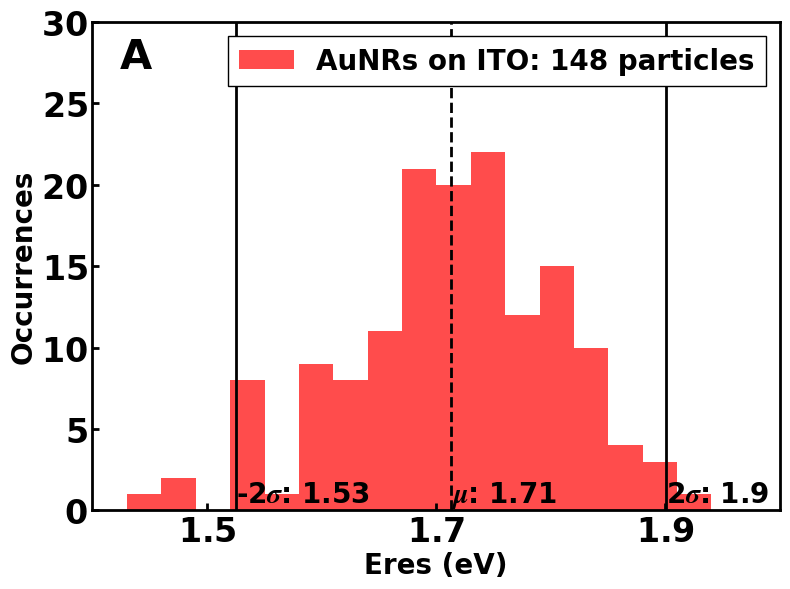

In [14]:
# difference in eres
fig, ax = plt.subplots()
binwidth = 0.03
target = exp_ito_data['eres']
target_avg = target.mean()
terget_std = target.std()

ylim = 30
ax.vlines(target_avg, 0, ylim, color='k', ls='--', lw=2)
ax.vlines(terget_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)
ax.vlines(-terget_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)

ax.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), color='red', alpha=0.7, label=f'AuNRs on ITO: {len(target)} particles')
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)

ax.text(-terget_std*2 + target_avg, 0.5, f'-2$\sigma$: {round(-terget_std*2 + target_avg, 2)}', fontsize=20)
ax.text(terget_std*2 + target_avg, 0.5, f'2$\sigma$: {round(terget_std*2 + target_avg, 2)}', fontsize=20)
ax.text(target_avg, 0.5, f'$\mu$: {round(target_avg, 2)}', fontsize=20)

ax.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax.set_xlabel('Eres (eV)')
ax.set_ylabel('Occurrences')
ax.set_ylim(0, ylim)
ax.set_xlim(1.4, 2.0)
ax.set_xticks([1.5, 1.7, 1.9])
ax.legend(fontsize=20)

In [15]:
ECI = pd.read_csv(Path(p_data, 'ECI_ITO.csv'))
glass = pd.read_csv(Path(p_data, '100623_ECI_ITO_glass.csv'))

print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['n'].mean())
print(ECI[(ECI['Wavelength'] > 400) & (ECI['Wavelength'] < 1000)]['k'].mean())

ECI['eV'] = 1240 / ECI['Wavelength']
glass['eV'] = 1240 / glass['Wavelength']
ECI.head()

1.9841242440944882
0.006554380577427821


,Wavelength,n,k,eV
0,193.787445,2.176239,0.681645,6.398763
1,195.369293,2.177690,0.669472,6.346954
2,196.951202,2.178717,0.657821,6.295976
3,198.533112,2.179358,0.646697,6.245810
4,200.115082,2.179650,0.636106,6.196435


0.0044635 0.0


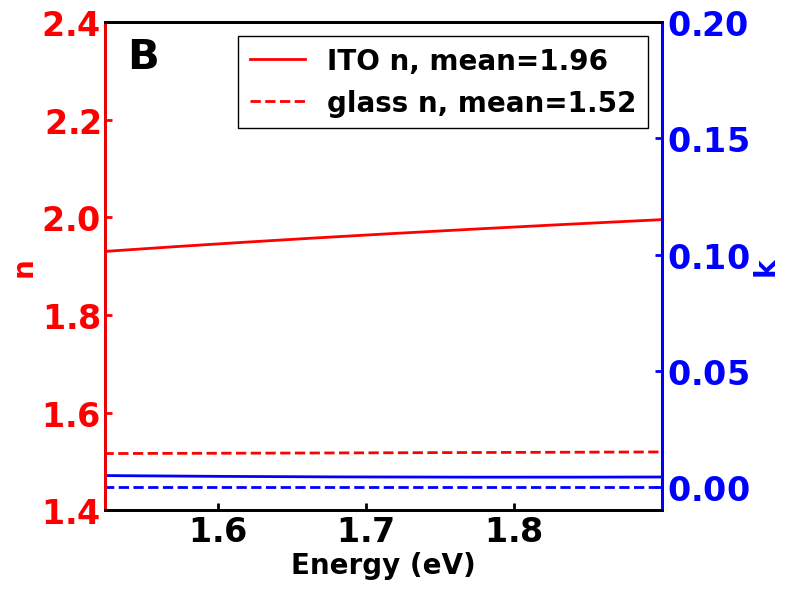

In [16]:
fig, ax1 = plt.subplots()

# Eres distribution from AuNRs on ITO
# ene_low = 1.64
# ene_high = 1.98

ene_low = 1.524
ene_high = 1.9

ax2 = ax1.twinx()

ECI_ITO_nmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['n'].mean()
ECI_ITO_kmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['k'].mean()

glass_ITO_nmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['n'].mean()
glass_ITO_kmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['k'].mean()

ax1.plot(ECI['eV'], ECI['n'], c='r', lw=2, label=f"ITO n, mean={round(ECI_ITO_nmean, 2)}")
ax2.plot(ECI['eV'], ECI['k'], c='b', lw=2, label=f"k, mean={round(ECI_ITO_kmean, 2)}")

ax1.plot(glass['eV'], glass['n'], c='r', ls='--', lw=2, label=f"glass n, mean={round(glass_ITO_nmean, 2)}")
ax2.plot(glass['eV'], glass['k'], c='b', ls='--', lw=2, label=f"k, mean={round(glass_ITO_kmean, 2)}")

ax1.set_xlabel("Energy (eV)")
ax1.set_ylabel("n")
ax2.set_ylabel("k")
ax1.set_xlim(ene_low, ene_high)
# ax1.set_xlim(1.4, 2.0)
ax1.set_xticks([1.6, 1.7, 1.8])
ax1.set_ylim(1.4, 2.4)
ax2.set_ylim(-0.01, 0.2)

ax2.spines['left'].set_color('r')
ax2.spines['right'].set_color('b')
ax1.tick_params(axis='y', colors='r')
ax2.tick_params(axis='y', colors='b')
ax1.yaxis.label.set_color('r')
ax2.yaxis.label.set_color('b')

ax1.text(0.04, 0.97, 'B', ha='left', va='top', transform=ax1.transAxes, fontsize=30)
ax1.legend(fontsize=20)

print(round(ECI_ITO_kmean, 7), round(glass_ITO_kmean, 7))
# plt.savefig("ITO_FigureS2B.svg", format="svg", dpi=300)

In [17]:
tio2_data = pd.read_csv(Path(p_data, 'tio2.csv'))
al2o3_data = pd.read_csv(Path(p_data, 'al2o3.csv'))

tio2_data['eV'] = 1240 / tio2_data['wav']
al2o3_data['wav'] = al2o3_data['wav']*10e2
al2o3_data['eV'] = 1240 / al2o3_data['wav']

(1.500, 1.900)

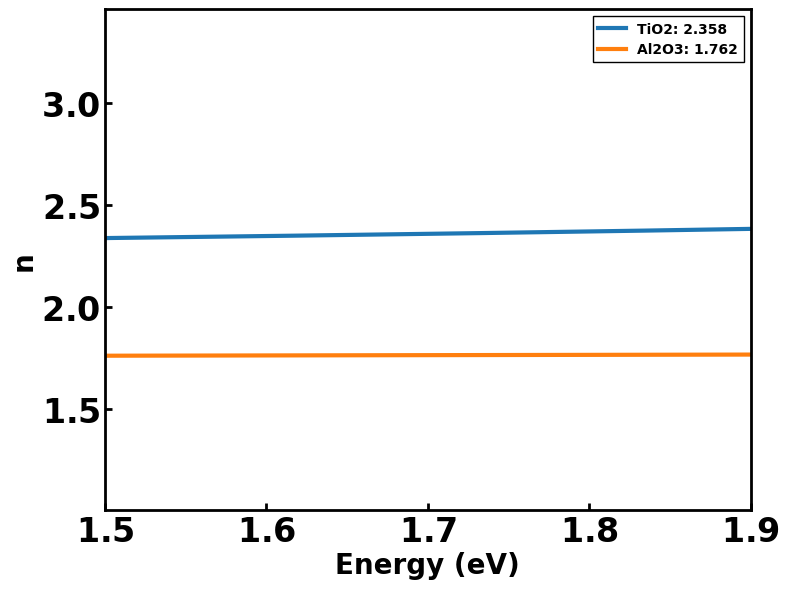

In [18]:
tio2_nmean = tio2_data[(tio2_data['eV'] > 1.52) & (tio2_data['eV'] < 1.9)]['n'].mean()
al2o3_nmean = al2o3_data[(al2o3_data['eV'] > 1.52) & (al2o3_data['eV'] < 1.9)]['n'].mean()

plt.plot(tio2_data["eV"], tio2_data["n"], label=f"TiO2: {round(tio2_nmean, 3)}")
# plt.plot(tio2_data["eV"], tio2_data["k"], label="k")

plt.plot(al2o3_data["eV"], al2o3_data["n"], label=f"Al2O3: {round(al2o3_nmean, 3)}")

plt.xlabel("Energy (eV)")
plt.ylabel("n")
plt.legend()

plt.xlim([1.5, 1.9])

0.0044635 0.0


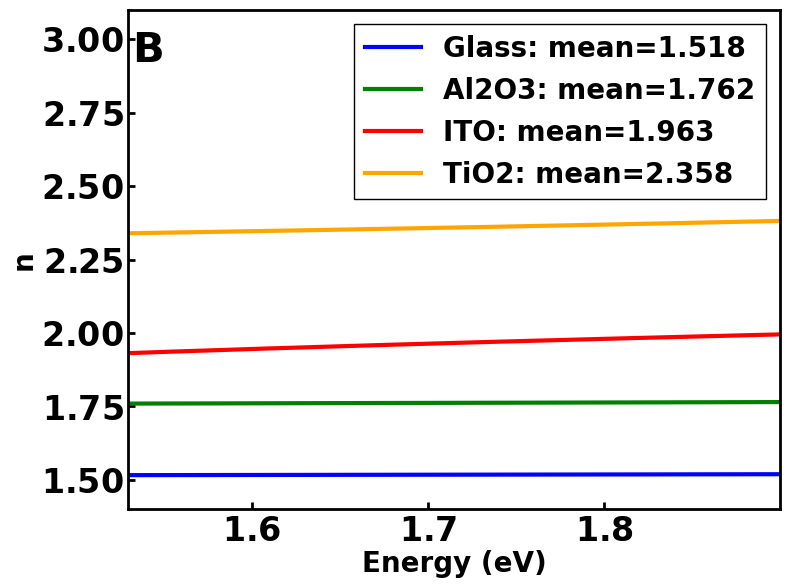

In [30]:
fig, ax = plt.subplots()

ene_low = 1.53
ene_high = 1.9

ECI_ITO_nmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['n'].mean()
glass_ITO_nmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['n'].mean()

ax.plot(glass['eV'], glass['n'], c='b', label=f"Glass: mean={round(glass_ITO_nmean, 3)}")
ax.plot(al2o3_data["eV"], al2o3_data["n"], c='g', label=f"Al2O3: mean={round(al2o3_nmean, 3)}")
ax.plot(ECI['eV'], ECI['n'], c='r', label=f"ITO: mean={round(ECI_ITO_nmean, 3)}")
ax.plot(tio2_data["eV"], tio2_data["n"], c='orange', label=f"TiO2: mean={round(tio2_nmean, 3)}")

ax.set_xlabel("Energy (eV)")
ax.set_ylabel("n")
ax.set_xlim(ene_low, ene_high)
# ax.set_xlim(1.4, 2.0)
ax.set_xticks([1.6, 1.7, 1.8])
ax.set_yticks([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])
ax.set_ylim(1.4, 3.1)

ax.text(0.04, 0.97, 'B', ha='left', va='top', transform=ax1.transAxes, fontsize=30)
ax.legend(fontsize=20)

print(round(ECI_ITO_kmean, 7), round(glass_ITO_kmean, 7))
# plt.savefig("ITO_FigureS2B.svg", format="svg", dpi=300)

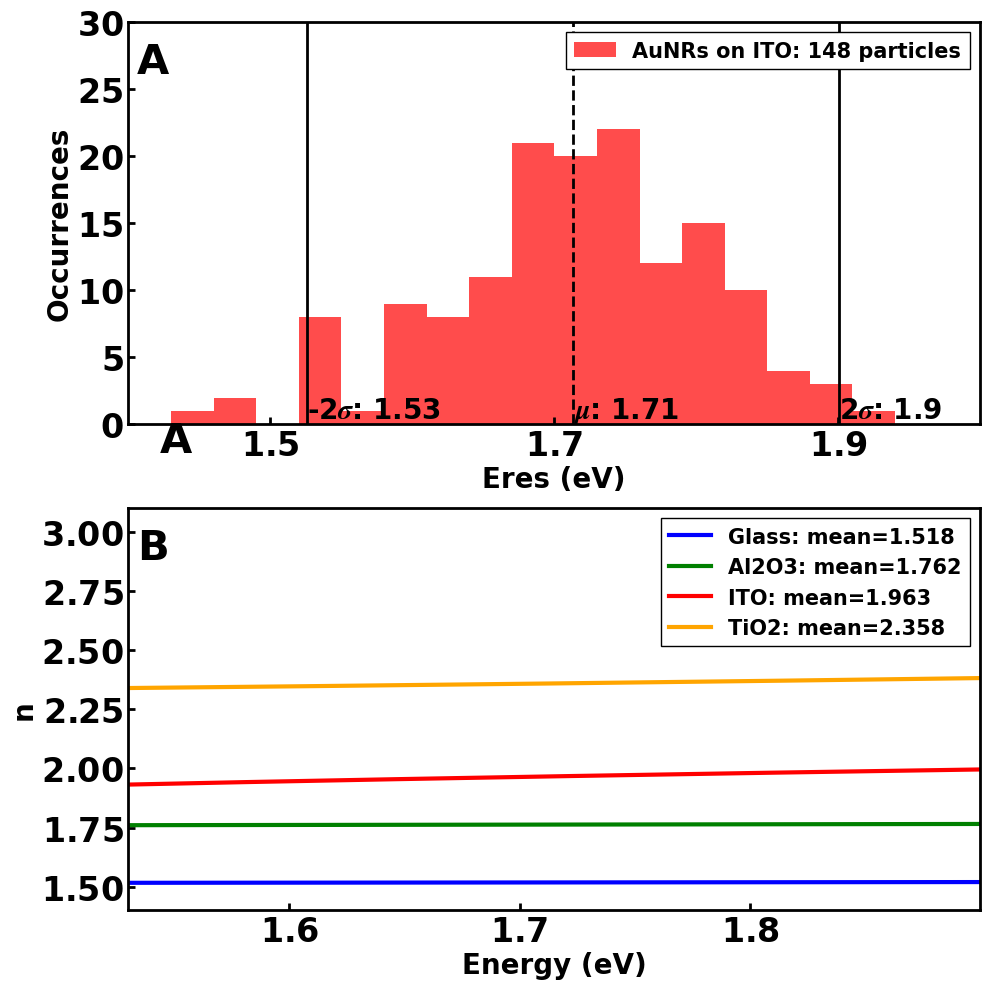

In [33]:
# Create a figure with two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(10, 10))

binwidth = 0.03
target = exp_ito_data['eres']
target_avg = target.mean()
terget_std = target.std()

ylim = 30
ax1.vlines(target_avg, 0, ylim, color='k', ls='--', lw=2)
ax1.vlines(terget_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)
ax1.vlines(-terget_std*2 + target_avg, 0, ylim, color='k', ls='-', lw=2)

ax1.hist(target, bins=np.arange(min(target), max(target)+binwidth, binwidth), color='red', alpha=0.7, label=f'AuNRs on ITO: {len(target)} particles')
# ax.text(0.01, 0.99, f'binwidth={binwidth}', ha='left', va='top', transform=ax.transAxes, fontsize=12)

ax1.text(-terget_std*2 + target_avg, 0.5, f'-2$\sigma$: {round(-terget_std*2 + target_avg, 2)}', fontsize=20)
ax1.text(terget_std*2 + target_avg, 0.5, f'2$\sigma$: {round(terget_std*2 + target_avg, 2)}', fontsize=20)
ax1.text(target_avg, 0.5, f'$\mu$: {round(target_avg, 2)}', fontsize=20)

ax1.text(0.04, 0.97, 'A', ha='left', va='top', transform=ax.transAxes, fontsize=30)

ax1.set_xlabel('Eres (eV)')
ax1.set_ylabel('Occurrences')
ax1.set_ylim(0, ylim)
ax1.set_xlim(1.4, 2.0)
ax1.set_xticks([1.5, 1.7, 1.9])
ax1.legend(fontsize=20)
ax1.legend(loc='upper right', fontsize=15)
ax1.text(0.01, 0.95, 'A', ha='left', va='top', transform=ax1.transAxes, fontsize=30)

ene_low = 1.53
ene_high = 1.9

ECI_ITO_nmean = ECI[(ECI['eV'] > ene_low) & (ECI['eV'] < ene_high)]['n'].mean()
glass_ITO_nmean = glass[(glass['eV'] > ene_low) & (glass['eV'] < ene_high)]['n'].mean()

ax2.plot(glass['eV'], glass['n'], c='b', label=f"Glass: mean={round(glass_ITO_nmean, 3)}")
ax2.plot(al2o3_data["eV"], al2o3_data["n"], c='g', label=f"Al2O3: mean={round(al2o3_nmean, 3)}")
ax2.plot(ECI['eV'], ECI['n'], c='r', label=f"ITO: mean={round(ECI_ITO_nmean, 3)}")
ax2.plot(tio2_data["eV"], tio2_data["n"], c='orange', label=f"TiO2: mean={round(tio2_nmean, 3)}")

ax2.set_xlabel("Energy (eV)")
ax2.set_ylabel("n")
ax2.set_xlim(ene_low, ene_high)
# ax.set_xlim(1.4, 2.0)
ax2.set_xticks([1.6, 1.7, 1.8])
ax2.set_yticks([1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])
ax2.set_ylim(1.4, 3.1)
ax2.legend(loc='upper right', fontsize=15)
ax2.text(0.01, 0.95, 'B', ha='left', va='top', transform=ax2.transAxes, fontsize=30)

plt.subplots_adjust(hspace=0)  # Remove the space between plots